In [1]:
import numpy as np
from scipy.stats import norm

def tauchen(rho, N, sigma):
    """
    Discretize a continuous AR(1), given parameters

    rho: persistence of AR(1)
    N: number of grid points
    sigma: standard deviation of AR innovations
    Returns:
        grid: the grid points
        P: transition matrix
    """

    # Constructing the grid
    sigma_z = np.sqrt(sigma**2 / (1 - rho**2))
    step = (2 * sigma_z * 3) / (N - 1)  # distance between points
    grid = np.zeros(N)  # initialize grid
    for i in range(N):
        grid[i] = -3 * sigma_z + i * step  # obtain points in grid

    # Construct transition matrix
    P = np.zeros((N, N))  # initialize matrix P
    if N > 1:
        for i in range(N):
            P[i, 0] = norm.cdf((grid[0] + step / 2 - rho * grid[i]) / sigma)  # normal distribution
            P[i, N - 1] = 1 - norm.cdf((grid[N - 1] - step / 2 - rho * grid[i]) / sigma)
            for j in range(1, N - 1):
                P[i, j] = (norm.cdf((grid[j] + step / 2 - rho * grid[i]) / sigma) -
                           norm.cdf((grid[j] - step / 2 - rho * grid[i]) / sigma))
    else:
        P = np.array([1])

    return grid, P


In [2]:
import random
random.seed(2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# TRABAJO FINAL. Macroeconomía Dinámica I
# Definimos los parámetros del modelo

beta = 0.98  # factor de descuento
alpha = 0.4  # participación del capital en la producción
delta = 0.012  # tasa de depreciación del capital
rho = 0.95  # persistencia del proceso
sigma_e = 0.0024  # desv estandar
sigma = 1.5

# Inciso a: empleando el método de Tauchen, calcular al aproximación discreta al proceso AR(1) de $z_t$

El proceso estocástico AR(1) es un proceso Markoviano de primer orden continuo, por lo que se requiere discretizarlo. Siguiendo a Tauchen (1986), el proceso AR(1) para $z_t$ puede aproximarse discretamente de la siguiente manera
$$
Z = (Z_1, ..., Z_5) = \begin{pmatrix} -0.02305845 & -0.01152923 & 0. & 0.01152923 & 0.02305845\end{pmatrix}
$$

con una matriz de transición

$$
\begin{bmatrix}
9.72668032\times 10^{-1} & 2.73319679\times 10^{-2} & 8.75655104\times 10^{-12} & 0 & 0 \\
4.11950941\times 10^{-3} & 9.80560997\times 10^{-1} & 1.53194940\times 10^{-2} & 1.63535852\times 10^{-12} & 0 \\
2.88590296\times 10^{-13} & 8.15458594\times 10^{-3} & 9.83690828\times 10^{-1} & 8.15458594\times 10^{-3} & 2.88546964\times 10^{-13} \\
2.80547015\times 10^{-32} & 1.63532921\times 10^{-12} & 1.53194940\times 10^{-2} & 9.80560997\times 10^{-1} & 4.11950941\times 10^{-3} \\
2.87095753\times 10^{-60} & 4.69918435\times 10^{-31} & 8.75659086\times 10^{-12} & 2.73319679\times 10^{-2} & 9.72668032\times 10^{-1}
\end{bmatrix}
$$

In [7]:
# -------------------------------------------------------------------------
# Inciso i): Metodo de Tauchen
# Definimos el numero de puntos de la malla del choque

q = 5

# Llamamos al metodo de Tauchen

zeta, P = tauchen(rho, q, sigma_e)

# Reporte de los valores

print("Valores de los choques:", zeta)  # valores de los choques
print("Matriz de transición:", P)  # matriz de transicion

Valores de los choques: [-0.02305845 -0.01152923  0.          0.01152923  0.02305845]
Matriz de transición: [[9.72668032e-01 2.73319679e-02 8.75655104e-12 0.00000000e+00
  0.00000000e+00]
 [4.11950941e-03 9.80560997e-01 1.53194940e-02 1.63535852e-12
  0.00000000e+00]
 [2.88590296e-13 8.15458594e-03 9.83690828e-01 8.15458594e-03
  2.88546964e-13]
 [2.80547015e-32 1.63532921e-12 1.53194940e-02 9.80560997e-01
  4.11950941e-03]
 [2.87095753e-60 4.69918435e-31 8.75659086e-12 2.73319679e-02
  9.72668032e-01]]


# Inciso b: usar el método de iteración de la función de valor apra resolver al formulación recursive de este problema y encontrar las reglas de decisión óptimas

**Def**. Un Equilibrio Competitivo Estocástico para esta economía es un conjunto de planes contingentes para las cantidades $c_t^1(z_t), c_{t + 1}^2(z^{t+1}), a_{t + 1}^2(z^{t+1})$ y de secuencias para las cantidades agregadas $Y_t, K_t$, los precios $w_t, R_t$ tales que


\begin{enumerate}
    \item En cada periodo t, dados $z_0, w_t, R_t$ y el proceso estocástico z, los planes $c_t^1(z_t), c_{t + 1}^2(z^{t+1}), a_{t + 1}^2(z^{t + 1})$ resuelven el problema del agente joven

    $$
    max_{\{ c_t^1, c_{t+1}^2\}_{t=0}^\infty} E_t\{log(c_t^1(z^t)) + \beta\}
    $$
\end{enumerate}



In [8]:



# -------------------------------------------------------------------------
# Inciso ii): Iteración de la función de valor

# Valor inicial para el capital y los precios
K = 31
w = 2.2
r = 0.04
A = 0
p = 200
# Construimos una malla de puntos para el capital
amalla = np.linspace(0, 70, p).reshape(-1, 1)

# Definimos una matriz para la utilidad de los jóvenes
U1 = np.zeros((p, q, p))

for i in range(p):  # activos de hoy
    for j in range(q):  # choque de hoy
        for l in range(p):  # activos de mañana
            c1 = np.maximum(np.exp(zeta[j]) * w + (1 + r) * amalla[i] - amalla[l], 1e-200)  # valor del consumo
            U1[i, j, l] = (c1 ** (1 - sigma)) / (1 - sigma)  # valor de la utilidad

# Definimos un vector para la utilidad de los retirados
U2 = np.zeros((p, q, p))

for i in range(p):  # activos de hoy
    for j in range(q):  # choque de hoy
        for l in range(p):  # activos de mañana
            c2 = np.maximum((1 + r) * amalla[i], 1e-200)  # valor del consumo
            U2[i, j, l] = (c2 ** (1 - sigma)) / (1 - sigma)  # valor de la utilidad

# Auxiliares para la iteración de la función de valor
V0 = np.zeros((p, q))
V1 = np.zeros((p, q))

termin = 0  # condición de término
iter = 1  # inicializa el número de iteraciones
maxit = 1000  # número máximo de iteraciones
crit = 1e-5  # criterio de tolerancia

# Auxiliar para las reglas de decisión óptimas
pol = np.zeros((p, q))




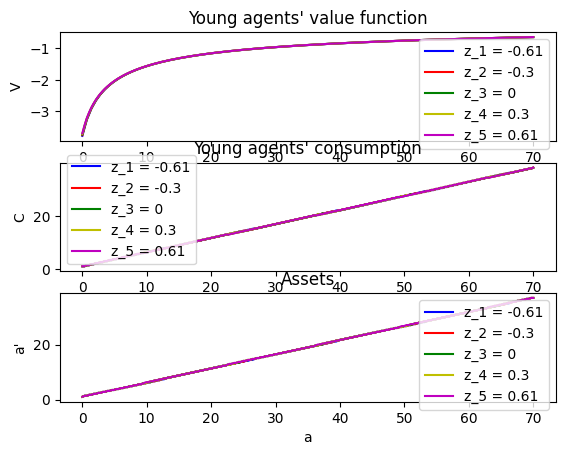

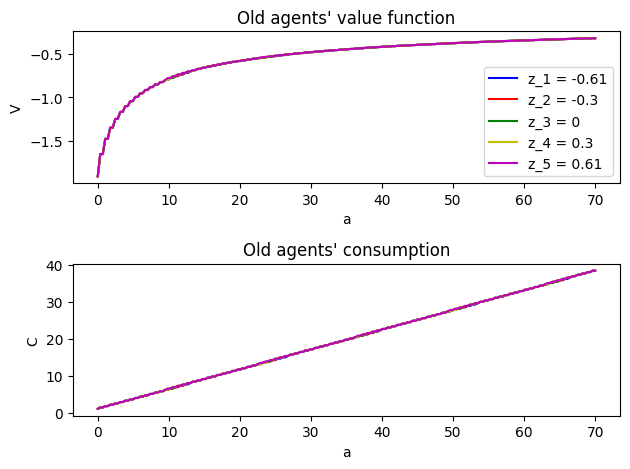

In [13]:

import numpy as np
import matplotlib.pyplot as plt

# Assume that p, q, maxit, crit, U1, U2, amalla, beta, P, zeta, w, r, and sigma are defined

termin = 0
iter = 0
V0 = np.zeros((p, q))
V1 = np.zeros((p, q))
pol = np.zeros((p, q), dtype=int)

# Algorithm
while termin == 0 and iter < maxit:
    for i in range(p):
        for j in range(q):
            aux = np.zeros(p)

            for l in range(p):
                aux[l] = U1[i, j, l]

                for m in range(q):
                    aux[l] += beta * P[j, m] * U2[l, m, j] # Fixed the indexing here

            V1[i, j], pol[i, j] = np.max(aux), np.argmax(aux)

    # Convergence criterion
    if np.linalg.norm(V0 - V1) < crit:
        termin = 1

    # Update values
    V0 = V1.copy()
    iter += 1


# Calculate young agents' consumption and assets
A_young = amalla[pol]
#C_young = np.exp(zeta) * w + (1 + r) * amalla[:, np.newaxis] - A_young
C_young = np.exp(zeta[:, np.newaxis]) * w + (1 + r) * amalla[:, np.newaxis] - A_young

# Plot young agents' value function, consumption, and assets
fig, axs = plt.subplots(3, 1)
colors = ['b', 'r', 'g', 'y', 'm']
labels = ['z_1 = -0.61', 'z_2 = -0.3', 'z_3 = 0', 'z_4 = 0.3', 'z_5 = 0.61']

for i in range(q):
    axs[0].plot(amalla, V1[:, i], colors[i], label=labels[i])
    axs[1].plot(amalla, C_young[:, i], colors[i], label=labels[i])
    axs[2].plot(amalla, A_young[:, i], colors[i], label=labels[i])

axs[0].set_title('Young agents\' value function')
axs[0].set_xlabel('a')
axs[0].set_ylabel('V')
axs[0].legend()

axs[1].set_title('Young agents\' consumption')
axs[1].set_xlabel('a')
axs[1].set_ylabel('C')
axs[1].legend()

axs[2].set_title('Assets')
axs[2].set_xlabel('a')
axs[2].set_ylabel("a'")
axs[2].legend()

# Calculate and plot old agents' consumption and value function
C_old = (1 + r) * amalla[pol]
V_old = C_old ** (1 - sigma) / (1 - sigma)

fig2, axs2 = plt.subplots(2, 1)

for i in range(q):
    axs2[0].plot(amalla, V_old[:, i], colors[i], label=labels[i])
    axs2[1].plot(amalla, C_old[:, i], colors[i], label=labels[i])

axs2[0].set_title('Old agents\' value function')
axs2[0].set_xlabel('a')
axs2[0].set_ylabel('V')
axs2[0].legend()

axs2[1].set_title("Old agents' consumption")
axs2[1].set_xlabel('a')
axs2[1].set_ylabel('C')

plt.tight_layout()
plt.show()


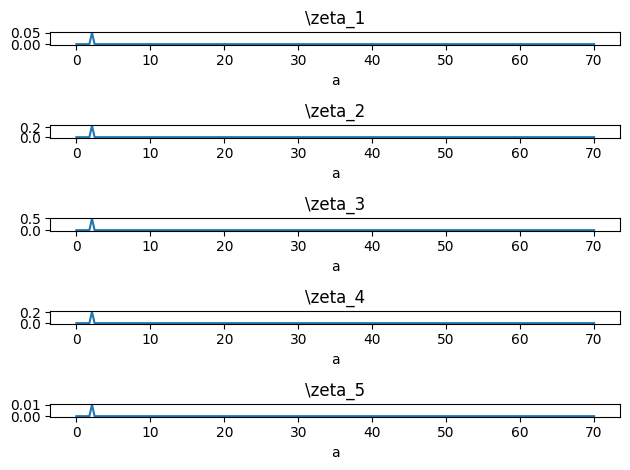

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Assume that T, P, amalla, C_young, zeta, and pi_acum are defined
T=10000
zt = np.zeros(T, dtype=int)
at = np.zeros(T + 1, dtype=int)
ai = np.zeros(T + 1, dtype=int)
ct = np.zeros(T)
shock = np.zeros(T + 1)

at[0] = 0
ai[0] = 1
zt[0] = 2

pi_acum = np.cumsum(P.T, axis=0).T

for t in range(T - 1):
    zt[t + 1] = np.argwhere(random.uniform(0, 1) <= pi_acum[zt[t]])[0][0]

for t in range(T):
    ai[t + 1] = pol[ai[t], zt[t]]
    at[t + 1] = amalla[ai[t + 1]]
    ct[t] = C_young[ai[t], zt[t]]
    shock[t] = zeta[zt[t]]

F = np.zeros((p, q))
state = np.zeros((p, q))

for i in range(p):
    for j in range(q):
        for t in range(1000, 10000):
            if ai[t] == i and zt[t] == j:
                state[i, j] += 1
        F[i, j] = state[i, j] / 9000

# Plot the results
fig, axs = plt.subplots(5, 1)
titles = ['\zeta_1', '\zeta_2', '\zeta_3', '\zeta_4', '\zeta_5']

for i in range(5):
    axs[i].plot(amalla, F[:, i])
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('a')

plt.tight_layout()
plt.show()
